In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
Sales = data.Sales.values.reshape(len(data['Sales']), 1)
TV = data.TV.values.reshape(len(data['Sales']), 1)
Radio = data.Radio.values.reshape(len(data['Sales']), 1)
Newspaper = data.Newspaper.values.reshape(len(data['Sales']), 1)

In [10]:
tv_model = linear_model.LinearRegression()
tv_model.fit(TV, Sales)
coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))
coeffs_tv = list(coeffs_tv)

radio_model = linear_model.LinearRegression()
radio_model.fit(Radio, Sales)
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_radio = list(coeffs_radio)

newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(Newspaper, Sales)
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coeffs_newspaper = list(coeffs_newspaper)

dict_Sales = {}
dict_Sales["TV"] = coeffs_tv
dict_Sales["Radio"] = coeffs_radio
dict_Sales["Newspaper"] = coeffs_newspaper

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [11]:
tv_rsq = tv_model.score(TV, Sales)
radio_rsq = radio_model.score(Radio, Sales)
newspaper_rsq = newspaper_model.score(Newspaper, Sales)

print("TV simple linear regression R-Square :", tv_rsq)
print("Radio simple linear regression R-Square :", radio_rsq)
print("Newspaper simple linear regression R-Square :", newspaper_rsq)
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
list_rsq

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [12]:
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


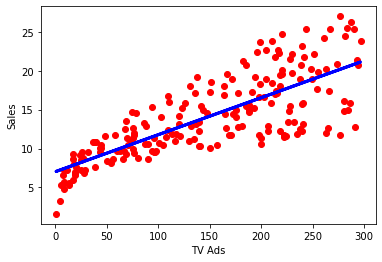

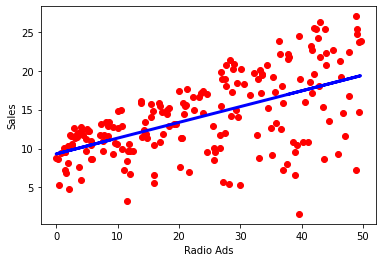

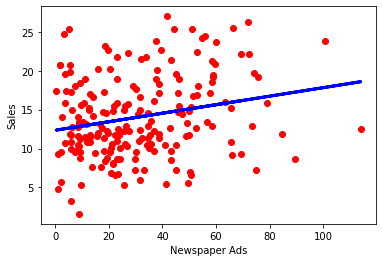

In [13]:
plt.scatter(TV, Sales,  color='red')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(TV, tv_model.predict(TV), color='blue', linewidth=3)
plt.show()

plt.scatter(Radio, Sales,  color='red')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(Radio, radio_model.predict(Radio), color='blue', linewidth=3)
plt.show()

plt.scatter(Newspaper, Sales,  color='red')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.plot(Newspaper, newspaper_model.predict(Newspaper), color='blue', linewidth=3)
plt.show()